In [44]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import joblib
from tkinter import *
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor

In [45]:
data = pd.read_csv('D:\\TITO\\Documents\\BANGKIT\\capstone\\price_prediction\\data\\price.csv')

In [46]:
data.head()

,Fish Species,Price,Grade,Catching Method,Sustainability,Actual Price
0,Bawal Hitam,36000,B,Farmed,Moderately sustainable,30000
1,Bawal Putih,72000,B,Farmed,Moderately sustainable,60000
2,Cakalang,30000,B,Farmed,Moderately sustainable,25000
3,Kakap Merah,66000,B,Farmed,Moderately sustainable,55000
4,Kembung,30000,B,Farmed,Moderately sustainable,25000


In [47]:
data.shape

(264, 6)

In [48]:
data.isnull().sum()

Fish Species       0
Price              0
Grade              0
Catching Method    0
Sustainability     0
Actual Price       0
dtype: int64

In [49]:
data.describe()

,Price,Actual Price
count,264.000000,264.000000
mean,49903.363636,68454.545455
std,59375.759491,69461.411301
min,6000.000000,25000.000000
25%,19200.000000,30000.000000
50%,30200.000000,55000.000000
75%,55250.000000,70000.000000
max,403200.000000,280000.000000


In [50]:
sorted(data['Price'],reverse=True)

[403200,
 336000,
 336000,
 322560,
 280000,
 268800,
 268800,
 268800,
 224000,
 224000,
 215040,
 201600,
 179200,
 168000,
 168000,
 161280,
 140000,
 134400,
 134400,
 115200,
 112000,
 112000,
 100800,
 96000,
 96000,
 92160,
 89600,
 86400,
 86400,
 84000,
 84000,
 84000,
 80640,
 80000,
 79200,
 76800,
 76800,
 76800,
 72000,
 72000,
 72000,
 72000,
 70000,
 69120,
 69120,
 67200,
 67200,
 67200,
 67200,
 66000,
 66000,
 64000,
 64000,
 63360,
 61440,
 60000,
 60000,
 57600,
 57600,
 57600,
 57600,
 57600,
 57600,
 57600,
 56000,
 56000,
 55000,
 54720,
 53760,
 52800,
 52800,
 52800,
 51200,
 50400,
 48000,
 48000,
 48000,
 48000,
 48000,
 48000,
 46080,
 46080,
 46080,
 45600,
 45600,
 44800,
 44000,
 44000,
 43776,
 43200,
 43200,
 43200,
 43200,
 42240,
 42000,
 42000,
 40320,
 40000,
 39600,
 38400,
 38400,
 38400,
 38400,
 38000,
 36480,
 36480,
 36480,
 36000,
 36000,
 36000,
 36000,
 36000,
 36000,
 36000,
 36000,
 36000,
 36000,
 35200,
 35000,
 34560,
 34560,
 34560,
 

In [8]:
# data = data[~(data['Price']>=6000.0) & (data['Price']<=403200.0)]
# data.shape
# data.head()

In [52]:
data['Fish Species'].unique()
data['Fish Species'] = data['Fish Species'].map({'Bawal Hitam':0,'Bawal Putih':1,'Cakalang':2,
                                                 "Kakap Merah":3,"Kembung":4,"Kerapu":5,
                                                 "Kuwe":6,"Makerel":7,"Salmon":8,
                                                 "Tenggiri":9,"Tongkol":10})

In [53]:
data['Grade'].unique()
data['Grade'] = data['Grade'].map({'C':0,'B':1,'A':2})

In [54]:
data['Sustainability'].unique()
data['Sustainability'] =data['Sustainability'].map({'Moderately sustainable':1,'Unsustainable':0})


In [55]:
data['Catching Method'].unique()
data['Catching Method'] = data['Catching Method'].map({'Farmed':3,'Netting':2, 'Spearfishing':0, 'Fishing Hook':1})

In [56]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaler2 = MinMaxScaler(feature_range=(0,1))
data['Actual Price'] = scaler.fit_transform(data[['Actual Price']])
data['Price'] = scaler2.fit_transform(data[['Price']])

In [72]:
reg = SVR(kernel='rbf')
reg.fit(X,y)

ValueError: Expected 2D array, got 1D array instead:
array=[0.0755287  0.16616314 0.06042296 0.1510574  0.06042296 0.2265861
 0.19637462 0.0755287  0.83081571 0.16616314 0.09969789 0.09365559
 0.20241692 0.0755287  0.18429003 0.0755287  0.27492447 0.23867069
 0.09365559 1.         0.20241692 0.12265861 0.03021148 0.0755287
 0.02265861 0.06797583 0.02265861 0.10574018 0.09063444 0.03021148
 0.40785498 0.0755287  0.04229607 0.06042296 0.13595166 0.04783484
 0.12336354 0.04783484 0.18630413 0.1611279  0.06042296 0.6898288
 0.13595166 0.08056395 0.0755287  0.16616314 0.06042296 0.1510574
 0.06042296 0.2265861  0.19637462 0.0755287  0.83081571 0.16616314
 0.09969789 0.02265861 0.06042296 0.01636455 0.0541289  0.01636455
 0.08559919 0.07301108 0.02265861 0.33736153 0.06042296 0.0327291
 0.03021148 0.0755287  0.02265861 0.06797583 0.02265861 0.10574018
 0.09063444 0.03021148 0.40785498 0.0755287  0.04229607 0.03927492
 0.09365559 0.03021148 0.08459215 0.03021148 0.12990937 0.11178248
 0.03927492 0.49244713 0.09365559 0.05377644 0.00755287 0.03021148
 0.00377644 0.02643505 0.00377644 0.04531722 0.03776435 0.00755287
 0.19637462 0.03021148 0.01359517 0.04531722 0.10574018 0.03524673
 0.09566969 0.03524673 0.14602216 0.12588117 0.04531722 0.54884189
 0.10574018 0.06143001 0.05740181 0.12990937 0.04531722 0.11782477
 0.04531722 0.17824773 0.15407855 0.05740181 0.66163142 0.12990937
 0.07673716 0.01510574 0.04531722 0.01007049 0.04028197 0.01007049
 0.06545821 0.05538771 0.01510574 0.26686808 0.04531722 0.02316213
 0.05740181 0.12990937 0.04531722 0.11782477 0.04531722 0.17824773
 0.15407855 0.05740181 0.66163142 0.12990937 0.07673716 0.07190332
 0.15891239 0.05740181 0.14441088 0.05740181 0.21691843 0.18791541
 0.07190332 0.79697885 0.15891239 0.09510574 0.02114804 0.05740181
 0.01510574 0.05135952 0.01510574 0.081571   0.0694864  0.02114804
 0.32326284 0.05740181 0.03081571 0.04531722 0.10574018 0.03524673
 0.09566969 0.03524673 0.14602216 0.12588117 0.04531722 0.54884189
 0.10574018 0.06143001 0.05740181 0.12990937 0.04531722 0.11782477
 0.04531722 0.17824773 0.15407855 0.05740181 0.66163142 0.12990937
 0.07673716 0.01510574 0.04531722 0.01007049 0.04028197 0.01007049
 0.06545821 0.05538771 0.01510574 0.26686808 0.04531722 0.02316213
 0.02114804 0.05740181 0.01510574 0.05135952 0.01510574 0.081571
 0.0694864  0.02114804 0.32326284 0.05740181 0.03081571 0.02839879
 0.07190332 0.02114804 0.06465257 0.02114804 0.10090634 0.08640483
 0.02839879 0.39093656 0.07190332 0.04       0.00302115 0.02114804
 0.         0.01812689 0.         0.03323263 0.02719033 0.00302115
 0.15407855 0.02114804 0.00785498 0.03323263 0.081571   0.02517623
 0.0735146  0.02517623 0.11379658 0.09768379 0.03323263 0.43605237
 0.081571   0.04612286 0.0429003  0.10090634 0.03323263 0.09123867
 0.03323263 0.13957704 0.12024169 0.0429003  0.52628399 0.10090634
 0.05836858 0.00906344 0.03323263 0.00503525 0.02920443 0.00503525
 0.04934542 0.04128902 0.00906344 0.21047331 0.03323263 0.01550856].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [57]:
data.head()

,Fish Species,Price,Grade,Catching Method,Sustainability,Actual Price
0,NaN,0.075529,1,3,1,0.019608
1,NaN,0.166163,1,3,1,0.137255
2,NaN,0.060423,1,3,1,0.000000
3,NaN,0.151057,1,3,1,0.117647
4,NaN,0.060423,1,3,1,0.000000


In [58]:
print(scaler.inverse_transform(data[['Actual Price']]))

[[ 30000.]
 [ 60000.]
 [ 25000.]
 [ 55000.]
 [ 25000.]
 [ 80000.]
 [ 70000.]
 [ 30000.]
 [280000.]
 [ 60000.]
 [ 38000.]
 [ 30000.]
 [ 60000.]
 [ 25000.]
 [ 55000.]
 [ 25000.]
 [ 80000.]
 [ 70000.]
 [ 30000.]
 [280000.]
 [ 60000.]
 [ 38000.]
 [ 30000.]
 [ 60000.]
 [ 25000.]
 [ 55000.]
 [ 25000.]
 [ 80000.]
 [ 70000.]
 [ 30000.]
 [280000.]
 [ 60000.]
 [ 38000.]
 [ 30000.]
 [ 60000.]
 [ 25000.]
 [ 55000.]
 [ 25000.]
 [ 80000.]
 [ 70000.]
 [ 30000.]
 [280000.]
 [ 60000.]
 [ 38000.]
 [ 30000.]
 [ 60000.]
 [ 25000.]
 [ 55000.]
 [ 25000.]
 [ 80000.]
 [ 70000.]
 [ 30000.]
 [280000.]
 [ 60000.]
 [ 38000.]
 [ 30000.]
 [ 60000.]
 [ 25000.]
 [ 55000.]
 [ 25000.]
 [ 80000.]
 [ 70000.]
 [ 30000.]
 [280000.]
 [ 60000.]
 [ 38000.]
 [ 30000.]
 [ 60000.]
 [ 25000.]
 [ 55000.]
 [ 25000.]
 [ 80000.]
 [ 70000.]
 [ 30000.]
 [280000.]
 [ 60000.]
 [ 38000.]
 [ 30000.]
 [ 60000.]
 [ 25000.]
 [ 55000.]
 [ 25000.]
 [ 80000.]
 [ 70000.]
 [ 30000.]
 [280000.]
 [ 60000.]
 [ 38000.]
 [ 30000.]
 [ 60000.]
 [ 25000.]

In [59]:
data

,Fish Species,Price,Grade,Catching Method,Sustainability,Actual Price
0,NaN,0.075529,1,3,1,0.019608
1,NaN,0.166163,1,3,1,0.137255
2,NaN,0.060423,1,3,1,0.000000
3,NaN,0.151057,1,3,1,0.117647
4,NaN,0.060423,1,3,1,0.000000
...,...,...,...,...,...,...
259,NaN,0.041289,0,1,0,0.176471
260,NaN,0.009063,0,1,0,0.019608
261,NaN,0.210473,0,1,0,1.000000
262,NaN,0.033233,0,1,0,0.137255


In [60]:
X = data.drop(['Price', 'Fish Species', 'Catching Method'],axis=1)
y = data['Price']
print(X.head())
print(y.head())

   Grade  Sustainability  Actual Price
0      1               1      0.019608
1      1               1      0.137255
2      1               1      0.000000
3      1               1      0.117647
4      1               1      0.000000
0    0.075529
1    0.166163
2    0.060423
3    0.151057
4    0.060423
Name: Price, dtype: float64


In [61]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [62]:
import tensorflow as tf

In [63]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=[3]),
    tf.keras.layers.Dense(1, activation='linear')
])

In [64]:
model.compile(optimizer=tf.keras.optimizers.Adam(), loss='mean_squared_error', metrics=['mse'])

In [65]:
import numpy as np

In [66]:
history = model.fit(X_train, y_train,validation_data=[X_test,y_test], epochs=100)

Epoch 1/100
7/7 [==============================] - 1s 32ms/step - loss: 0.0207 - mse: 0.0207 - val_loss: 0.0358 - val_mse: 0.0358
Epoch 2/100
7/7 [==============================] - 0s 11ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0297 - val_mse: 0.0297
Epoch 3/100
7/7 [==============================] - 0s 12ms/step - loss: 0.0098 - mse: 0.0098 - val_loss: 0.0237 - val_mse: 0.0237
Epoch 4/100
7/7 [==============================] - 0s 12ms/step - loss: 0.0076 - mse: 0.0076 - val_loss: 0.0204 - val_mse: 0.0204
Epoch 5/100
7/7 [==============================] - 0s 10ms/step - loss: 0.0065 - mse: 0.0065 - val_loss: 0.0174 - val_mse: 0.0174
Epoch 6/100
7/7 [==============================] - 0s 10ms/step - loss: 0.0059 - mse: 0.0059 - val_loss: 0.0147 - val_mse: 0.0147
Epoch 7/100
7/7 [==============================] - 0s 11ms/step - loss: 0.0050 - mse: 0.0050 - val_loss: 0.0135 - val_mse: 0.0135
Epoch 8/100
7/7 [==============================] - 0s 11ms/step - loss: 0.0046 - mse: 0.00

(0.0, 50.0)

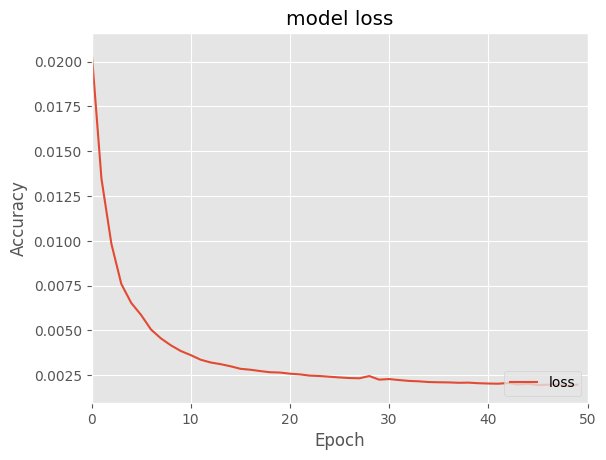

In [67]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')
plt.title('model loss')
plt.plot(history.history['mse'][:50], label='loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.xlim(0, 50)


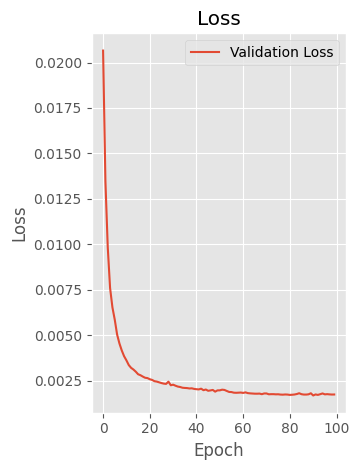

In [68]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Validation Loss')
# Add any additional metrics you want to plot, e.g., accuracy
# plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [69]:
y_pred1 = model.predict(X_test)

In [70]:
score1 = metrics.r2_score(y_test,y_pred1)
print(score1)

0.8723214299454675


In [77]:
data_new = pd.DataFrame({
    'Grade':2,
    'Sustainability':1,
    'Actual Price' : 20000

},index=[0])

if data_new['Grade'].iloc[0] == 0 or data_new['Actual Price'].iloc[0] == 0:
    result_array = np.array([0])
    float_number = float(result_array[0])
    price = float_number
else:
    data_new['Actual Price'] = scaler.transform(data_new[['Actual Price']])
    prediction = model.predict(data_new)
    prediction = scaler2.inverse_transform(prediction)
    prediction_float = prediction.item()
    rounded_value = round(prediction_float, 1)
    price = rounded_value

print(price)

29368.5
